In [1]:
"""
Alunos:
    David Cardoso Yonekura: dcy.eng17@uea.edu.br
    Lucas da Silva Lima: ldsllm.eng@uea.edu.br
    Rafael Barbosa de Carvalho: rbc.eng@uea.edu.br

"""

import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron

## Leitura dos dados

É feito um ajuste no vetor X para facilitar o cálculo do viés 

In [2]:
with open('data/dataAll.txt', 'rb') as file:
    auxFile = file.read()

dataAll = np.frombuffer(auxFile)
dataAll.resize((int(len(dataAll)/3)), 3)
X = dataAll[...,0:2] #[[x01,x02], ...]
y = dataAll[...,2] #[[yd0], [yd1], ...]

X = np.insert(X, 2, 1, axis=1)  #adicionando x_0 no x(n)

## Inicialização do neurônio

O neurônio é inicializado com a taxa de aprendizado igual a 0.1, e um intervalo de pesos \[-0.5, 0.5\]


In [3]:
n = Neuron(.1, -.5, .5) # lr = .1, intervalo = [-0.5, 0.5]
print("Vetor de pesos inicial: ",n.weightArray)
n.fit_print(X, y)

Vetor de pesos inicial:  [-0.49792663  0.22613474 -0.16763646]
Vetor de pesos Alterado:  [ 35.88091337 -24.18809526  -0.26763646]
Vetor de pesos Alterado:  [ -17.77813663 -100.68384526   -0.36763646]
Vetor de pesos Alterado:  [ 55.01788337 -64.85428526  -0.26763646]
Vetor de pesos Alterado:  [137.61658337  15.00154474  -0.16763646]
Vetor de pesos Alterado:  [143.46234337 -63.29304526  -0.26763646]
Vetor de pesos Alterado:  [ 103.45343337 -141.18573526   -0.36763646]
Vetor de pesos Alterado:  [157.12324337 -92.09346526  -0.46763646]
Vetor de pesos Alterado:  [ 104.16318337 -148.96292526   -0.36763646]
Vetor de pesos Alterado:  [163.72270337 -98.84059526  -0.46763646]
Vetor de pesos Alterado:  [ 118.19807337 -164.47652526   -0.36763646]
Vetor de pesos Alterado:  [208.91393337 -89.76320526  -0.46763646]
Vetor de pesos Alterado:  [ 151.13294337 -150.07135526   -0.36763646]
Vetor de pesos Alterado:  [ 102.86638337 -198.54107526   -0.26763646]
Vetor de pesos Alterado:  [ 1.73313733e+02 -1.56

In [4]:
for i in range(n.epoch):
    print("Epoca ", i+1, "quantidade de ajuste: ", n.fitCountEpoch[i])
    
print("Alterações totais no vetor de Pesos: ", n.fitCountWeight)
print("Numero de Epocas: ", n.epoch)
print("Vetor de Pesos no final: ", np.around(n.weightArray,4))
x = [i for i in range(-len(dataAll),len(dataAll))]
line = [(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x]# calcula a reta y = mx + b

Epoca  1 quantidade de ajuste:  24
Epoca  2 quantidade de ajuste:  0
Alterações totais no vetor de Pesos:  24
Numero de Epocas:  2
Vetor de Pesos no final:  [ 218.3046 -217.5061    0.2324]


## Visualização dos dados e reta gerada pelo modelo

Utilizou-se um meshgrid para delimitar as regiões de cada classe, e como esperado, obteve-se 2 regiões separadas por uma reta.

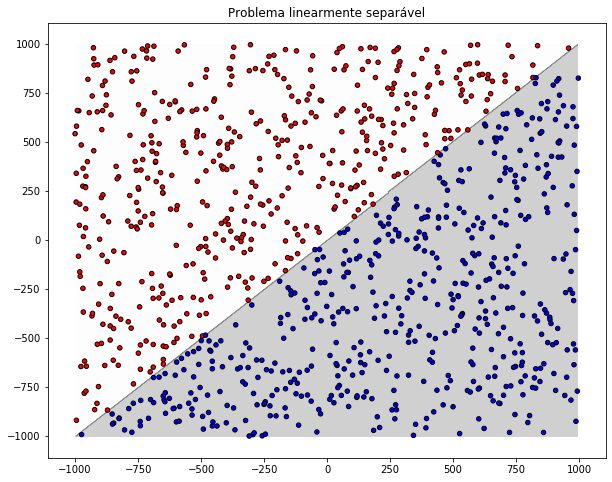

In [5]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 5),
                     np.arange(y_min, y_max, 5))

f, axarr = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
color = np.where(y == 0, 'r', 'b')

for idx, clf, tt in zip([[0,0]],
                        [n],
                        ['Problema linearmente separável']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    axarr.contourf(xx, yy, Z, alpha=0.2,cmap='Greys')
    axarr.scatter(X[:, 0], X[:, 1], c=color, s=20, edgecolor='k',cmap='Greys')
    axarr.set_title(tt)

plt.show()

